Trabajo Practico Final - Arquipa, Juan Agustín 43.949.474
                        - Romero, Nahuel 42.706.292
-> Desarrollo del TP Final

## MODELO NUMERO 1
-> Regresion LIneal aplcada etimologicamente en diversos parametros intercaldos.

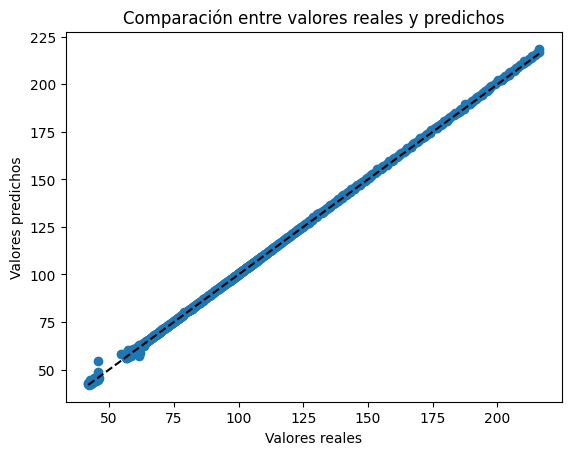

'\n# Modelo 2: Random Forest Regressor\nmodel_rf = RandomForestRegressor()\nmodel_rf.fit(X_train, y_train)\n\n\n\n\n# Evaluar los modelos en el conjunto de prueba\nmse_svr, r2_svr = evaluate_model(model_svr, X_test, y_test)\nmse_rf, r2_rf = evaluate_model(model_rf, X_test, y_test)\n\n\n# Imprimir las métricas obtenidas\nprint("Métricas del modelo SVR:")\nprint("MSE:", mse_svr)\nprint("R^2:", r2_svr)\nprint("\nMétricas del modelo Random Forest:")\nprint("MSE:", mse_rf)\nprint("R^2:", r2_rf)\nprint("\nMétricas del modelo Regresión Lineal:")\nprint("MSE:", mse_lr)\nprint("R^2:", r2_lr)\n'

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
#from sklearn.metrics import mean_squared_error, r2_score

url = 'datos_trabajo_final_2.csv'
datos_dolar = pd.read_csv(url, index_col=0)

datos_dolar.head()

url_y_test = 'y_test.csv'
first_test = int(len(datos_dolar) * 0.9)
testeo_def = datos_dolar.iloc[first_test:]
X = datos_dolar.iloc[:first_test]
X = datos_dolar.drop(columns=['y'])

y = datos_dolar[['y']]

first_val = int(len(X) * 0.8)
X_train = X.iloc[:first_val]
y_train = y.iloc[:first_val]

#Solo puedo tocar estos datos una vez...
X_test = X.iloc[first_val:]
y_test = pd.read_csv(url_y_test, index_col=0)

# Modelo 1: Support Vector Regressor (SVR)
#model_svr = SVR()
#model_svr.fit(X_train, y_train)
# Modelo 3: Regresión Lineal

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Función para evaluar un modelo y obtener las métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(model_lr, X_test, y_test)

y_pred = model_lr.predict(X_test)

# Crear un gráfico de puntos (scatter plot)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')

# Trazar una línea diagonal que representa una relación perfecta entre los valores reales y los valores predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Mostrar el gráfico
plt.show()




'''
# Modelo 2: Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)




# Evaluar los modelos en el conjunto de prueba
mse_svr, r2_svr = evaluate_model(model_svr, X_test, y_test)
mse_rf, r2_rf = evaluate_model(model_rf, X_test, y_test)


# Imprimir las métricas obtenidas
print("Métricas del modelo SVR:")
print("MSE:", mse_svr)
print("R^2:", r2_svr)
print("\nMétricas del modelo Random Forest:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)
print("\nMétricas del modelo Regresión Lineal:")
print("MSE:", mse_lr)
print("R^2:", r2_lr)
'''

Elegimos en conjunto estas métricas porque son ampliamente utilizadas y proporcionan información útil sobre el rendimiento de un modelo de regresión. El MSE permite evaluar la precisión numérica del modelo y el R^2 proporciona una medida de la bondad del ajuste global. Combinando ambas métricas, se obtiene una visión más completa del rendimiento del modelo

# Modelo 2, implementando unsado SGDRegresor y metrica mean_absoulte_error

Importamos el las metricas y el modelo, tambien el scaler y el model_selection que nos servira para 
entrenar el modelo

In [6]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

Iniciamos el escalador y ajustamos los datos y los transformamos

In [14]:
y = datos_dolar['y']
#Antes usamos train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#Iniciamos el escalador
scaler = RobustScaler()

#Fit del escalador y la transformacion de datos
pts_scaled_X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
pts_scaled_X_test = scaler.transform(X_test.values.reshape(-1, 1))

Entrenamos el modelo con SGDRegressor usando parametros default.
Instanciamos el modelo con con un random state

In [18]:
#Instanciamos el modelo con random state
rng = np.random.RandomState(0)
sgdmodel = SGDRegressor(random_state=rng)

#Entrenamos el modelo con los datos
sgdmodel.fit(X_train, y_train)

#Obtenemos la prediccion
ypredic = sgdmodel.predict(X_test)
#Obtenemos el error absoluto medio
mae_y = mean_absolute_error(y_test, ypredic)